In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi * 2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # -1.0 - 1.0
n_data = len(correct_data)

In [3]:
n_in = 1
n_mid = 1
n_out = 1

In [4]:
wb_width = 0.01
eta = 0.1
epoch = 2001
interval = 200

In [5]:
# 은닉층 클래스 구현

class MiddleLayer:
    def __init__(self, n_upper, n): # 가중치와 편향
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1 + np.exp(-u)) # 은닉층의 활성화함수 = 시그모이드함수
    
    def backward(self, grad_y): #역전파
        delta = grad_y * (1 - self.y)*self.y # 시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta) # 전치 T, delta
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): # 가중치와 편향 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b        

In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u 
    
    def backward(self, t): #역전파
        delta = self.y-t # 시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta) # 전치 T, delta
        self.grad_b = np.sum(delta, axis=0)        
        
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self, eta): # 가중치와 편향 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b   

In [7]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

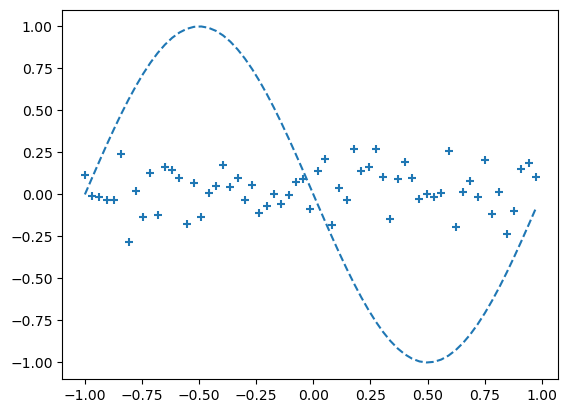

Epoch:0/2001 Error:0.2698960303988872


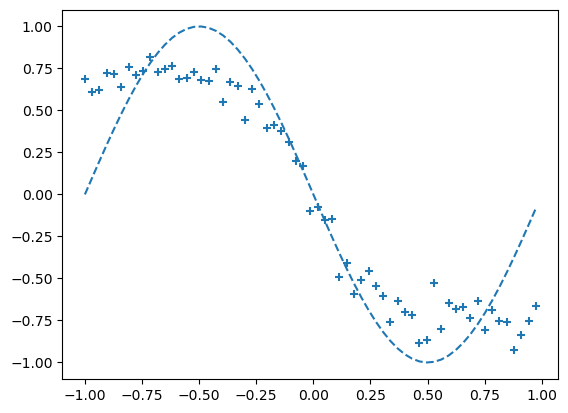

Epoch:200/2001 Error:0.037065041889519146


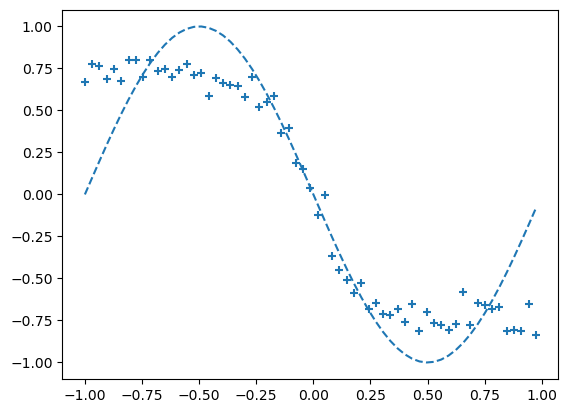

Epoch:400/2001 Error:0.03637685344612378


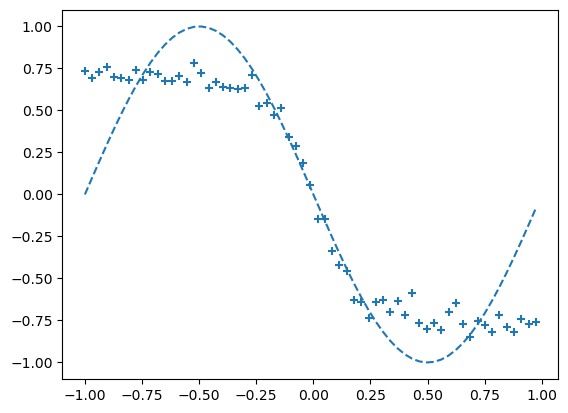

Epoch:600/2001 Error:0.036587720408490634


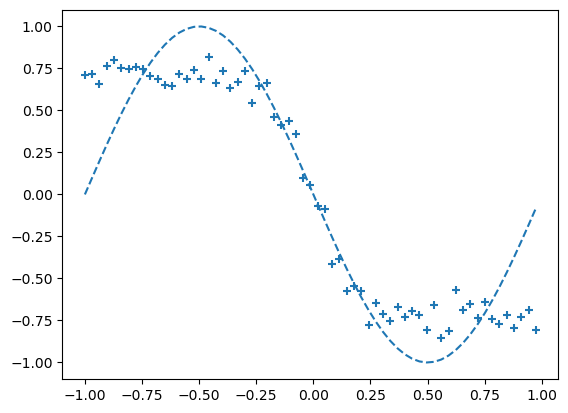

Epoch:800/2001 Error:0.03568480561283815


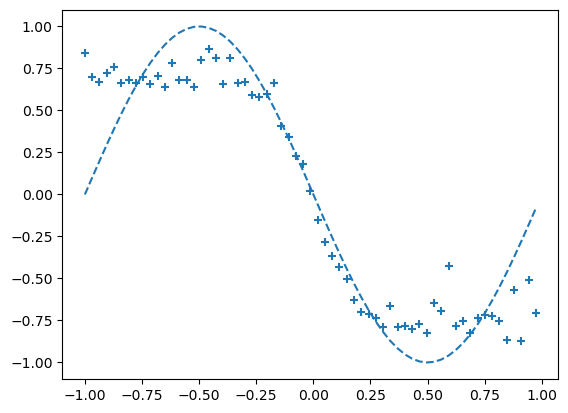

Epoch:1000/2001 Error:0.033737164097668054


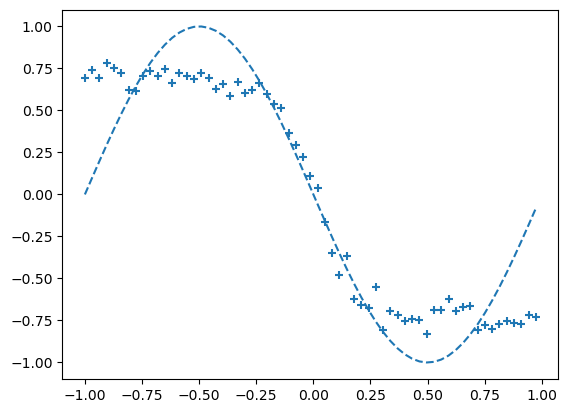

Epoch:1200/2001 Error:0.03596903935422394


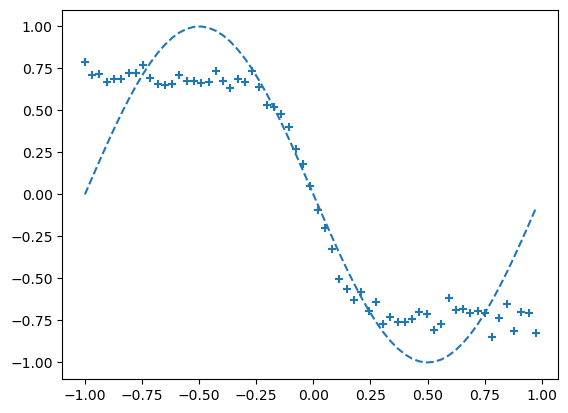

Epoch:1400/2001 Error:0.03572002479588485


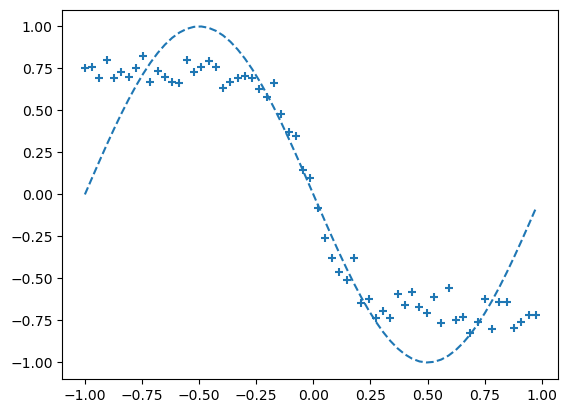

Epoch:1600/2001 Error:0.03668680448224999


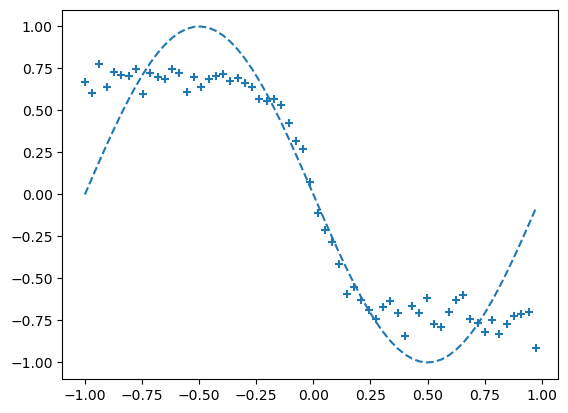

Epoch:1800/2001 Error:0.0363598844959747


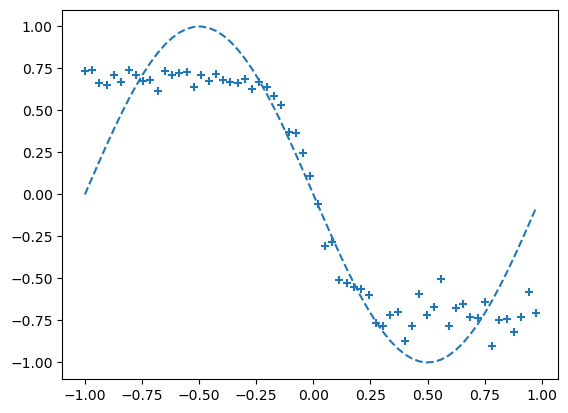

Epoch:2000/2001 Error:0.03502709130931227


In [8]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        # 순전파
        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)

        #역전파
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x) 
        
        #갱신
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += 1.0/2.0*np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
            
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error:" + str(total_error/n_data) )